# 100 pandas puzzles

Inspired by [100 Numpy exerises](https://github.com/rougier/numpy-100), here are 100* short puzzles for testing your knowledge of [pandas'](http://pandas.pydata.org/) power.

Since pandas is a large library with many different specialist features and functions, these excercises focus mainly on the fundamentals of manipulating data (indexing, grouping, aggregating, cleaning), making use of the core DataFrame and Series objects. 

Many of the excerises here are stright-forward in that the solutions require no more than a few lines of code (in pandas or NumPy... don't go using pure Python or Cython!). Choosing the right methods and following best practices is the underlying goal.

The exercises are loosely divided in sections. Each section has a difficulty rating; these ratings are subjective, of course, but should be a seen as a rough guide as to how inventive the required solution is.

# The Basics

## Importing pandas

**Getting started and checking your pandas setup**

Difficulty: *easy* 

### Import pandas under the name `pd`.

In [157]:
import pandas as pd

## Print the version of pandas that has been imported.

In [158]:
print(pd.__version__)

0.23.4


## Print out all the version information of the libraries that are required by the pandas library.

In [159]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.6.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.23.4
pytest: None
pip: 18.1
setuptools: 40.6.3
Cython: 0.29.2
numpy: 1.15.4
scipy: 1.1.0
pyarrow: None
xarray: None
IPython: 7.2.0
sphinx: None
patsy: None
dateutil: 2.7.5
pytz: 2018.7
blosc: None
bottleneck: None
tables: None
numexpr: None
feather: None
matplotlib: 3.0.2
openpyxl: None
xlrd: None
xlwt: None
xlsxwriter: None
lxml: 4.3.0
bs4: 4.6.3
html5lib: None
sqlalchemy: None
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None


## Create a DataFrame `df` from this dictionary `data` which has the index `labels`.
A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

Difficulty: *easy*

Note: remember to import numpy using:
```python
import numpy as np
```

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)



In [160]:
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)

## Display a summary of the basic information about this DataFrame and its data.

In [161]:
df.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
animal      10 non-null object
age         8 non-null float64
visits      10 non-null int64
priority    10 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


## Return the first 3 rows of the DataFrame `df`.

In [163]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


## Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [164]:
df[['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


## Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [165]:
df[['animal', 'age']].iloc[[3,4,5],]

,animal,age
d,dog,NaN
e,dog,5.0
f,cat,2.0


## Select only the rows where the number of visits is greater than 3.

In [166]:
mask = df.age>3
df[mask]

,animal,age,visits,priority
e,dog,5.0,2,no
g,snake,4.5,1,no
i,dog,7.0,2,no


## Select the rows where the age is missing, i.e. is `NaN`.

In [167]:
df[df.age.isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


## Select the rows where the animal is a cat *and* the age is less than 3.

In [168]:
mask1 = df.animal=='cat'
mask2 = df.age<3

df[mask1 & mask2]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


## Select the rows the age is between 2 and 4 (inclusive).

In [169]:
mask2 = (df.age>2) & (df.age<=4)

df[mask2]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
j,dog,3.0,1,no


## Change the age in row 'f' to 1.5.

In [170]:
df.loc['f','age']=1.5
df.loc['f']

animal      cat
age         1.5
visits        3
priority     no
Name: f, dtype: object

## Calculate the sum of all visits (the total number of visits).

In [171]:
df.visits.sum()

19

## Calculate the mean age for each different animal in `df`.

In [172]:
df.groupby('animal').agg({'visits':'mean', 'age':'sum'})

,visits,age
animal,,
cat,2.0,7.0
dog,2.0,15.0
snake,1.5,5.0


## Append a new row 'k' to `df` with your choice of values for each column. 
#### Then delete that row to return the original DataFrame.

In [173]:
new_vals = ['monkey', 500, 10000, 'yes']
df.loc['k'] = new_vals
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [174]:
df.drop('k', inplace=True)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


## Count the number of each type of animal in `df`.

In [175]:
df.animal.value_counts()

dog      4
cat      4
snake    2
Name: animal, dtype: int64

## Sort `df` first by the values in the 'age' in *decending* order
### Then by the value in the 'visit' column in *ascending* order.

In [176]:
df.sort_values(['age','visits'], ascending=[False, True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


## The 'priority' column contains the values 'yes' and 'no'. 

#### Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [177]:
mapping = {'yes':True, 'no':False}
df.priority = df.priority.map(mapping)
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


## In the 'animal' column, change the 'snake' entries to 'python'.

In [178]:
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


In [179]:
df.animal = df.animal.replace('snake', 'python')
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,python,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


In [180]:
#df.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
df.pivot_table(values='visits', aggfunc='sum', index='animal', columns='priority')

priority,False,True
animal,,
cat,3.0,5.0
dog,5.0,3.0
python,3.0,NaN


## For each animal type and each number of visits...
...find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).

In [181]:
grouped = df.groupby(['animal','visits'])
grouped.mean().sort_values(['animal','visits'])

age  priority
animal visits                
cat    1       2.50       1.0
       3       2.25       0.5
dog    1       3.00       0.0
       2       6.00       0.0
       3        NaN       1.0
python 1       4.50       0.0
       2       0.50       0.0

In [182]:
#df.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All') 
df.pivot_table(index='animal', columns=['visits', 'priority'], values=['age'], aggfunc='mean')

age                        
visits       1           2     3      
priority False True  False False True 
animal                                
cat        NaN   2.5   NaN   1.5   3.0
dog        3.0   NaN   6.0   NaN   NaN
python     4.5   NaN   0.5   NaN   NaN

# DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

## How do you filter out rows which contain the same integer as the row immediately above? 
You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

In [183]:
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,python,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


In [184]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df[df.A.shift(1)!=df.A]

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


In [185]:
df.drop_duplicates(subset=['A'], inplace=False)

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


## How do you subtract the row mean from each element in the row?
Use the following dataframe:
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```



In [186]:
# Create timeit function for funsies:
from time import time
def t_go():
    global t0
    t0 = time()
    
def t_stop():
    global t0
    print("Runtime: {0:.2f}".format(time() - t0))
t_go()
t_stop()

Runtime: 0.00


In [187]:
df = pd.DataFrame(np.random.random(size=(5000, 30000)))
df.shape

(5000, 30000)

In [188]:
from time import time
t_go()
df.apply(lambda x: x-x.mean(), axis=1)
t_stop()

Runtime: 4.52


In [189]:
t_go()
df.sub(df.mean(axis=1), axis=0)
t_stop()

Runtime: 1.37


## Which column of numbers has the smallest sum?
Use the following dataframe:
```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```


In [190]:
df = pd.DataFrame(np.random.random(size=(10, 10)), columns=list('abcdefghij'))
df

,a,b,c,d,e,f,g,h,i,j
0,0.261312,0.332098,0.571047,0.699890,0.357301,0.206748,0.289623,0.246778,0.905991,0.766184
1,0.360664,0.435019,0.216104,0.814259,0.917948,0.799251,0.840189,0.395982,0.476492,0.218410
2,0.378897,0.080283,0.399024,0.112793,0.783444,0.829736,0.818472,0.123662,0.215591,0.627705
3,0.951869,0.011349,0.231773,0.173066,0.191624,0.615240,0.058733,0.146398,0.793617,0.188674
4,0.986260,0.587509,0.267566,0.230631,0.533580,0.950299,0.482832,0.407996,0.843975,0.414518
5,0.216033,0.643035,0.177181,0.849570,0.127010,0.159095,0.079074,0.865271,0.276027,0.421276
6,0.747843,0.093097,0.814049,0.430652,0.162602,0.428585,0.142377,0.750507,0.259417,0.355771
7,0.715541,0.537535,0.978776,0.800816,0.183084,0.741767,0.066993,0.105458,0.297830,0.857056
8,0.820153,0.081905,0.709842,0.156070,0.165385,0.825715,0.541096,0.506435,0.931710,0.748702
9,0.663934,0.425539,0.838439,0.858198,0.466099,0.022736,0.239609,0.103355,0.615479,0.845632


In [191]:
df.sum().idxmin()

'b'

In [192]:
df.idxmax(axis=0)

a    4
b    5
c    7
d    9
e    1
f    4
g    1
h    5
i    8
j    7
dtype: int64

In [193]:
df.idxmax(axis=1)

0    i
1    e
2    f
3    a
4    a
5    h
6    c
7    c
8    i
9    d
dtype: object

## How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

In [194]:
# Make some duplicates 
df.iloc[1]=df.iloc[0]
df.iloc[5]=df.iloc[6]
df

,a,b,c,d,e,f,g,h,i,j
0,0.261312,0.332098,0.571047,0.699890,0.357301,0.206748,0.289623,0.246778,0.905991,0.766184
1,0.261312,0.332098,0.571047,0.699890,0.357301,0.206748,0.289623,0.246778,0.905991,0.766184
2,0.378897,0.080283,0.399024,0.112793,0.783444,0.829736,0.818472,0.123662,0.215591,0.627705
3,0.951869,0.011349,0.231773,0.173066,0.191624,0.615240,0.058733,0.146398,0.793617,0.188674
4,0.986260,0.587509,0.267566,0.230631,0.533580,0.950299,0.482832,0.407996,0.843975,0.414518
5,0.747843,0.093097,0.814049,0.430652,0.162602,0.428585,0.142377,0.750507,0.259417,0.355771
6,0.747843,0.093097,0.814049,0.430652,0.162602,0.428585,0.142377,0.750507,0.259417,0.355771
7,0.715541,0.537535,0.978776,0.800816,0.183084,0.741767,0.066993,0.105458,0.297830,0.857056
8,0.820153,0.081905,0.709842,0.156070,0.165385,0.825715,0.541096,0.506435,0.931710,0.748702
9,0.663934,0.425539,0.838439,0.858198,0.466099,0.022736,0.239609,0.103355,0.615479,0.845632


In [195]:
df[df.duplicated(keep='last')]

,a,b,c,d,e,f,g,h,i,j
0,0.261312,0.332098,0.571047,0.699890,0.357301,0.206748,0.289623,0.246778,0.905991,0.766184
5,0.747843,0.093097,0.814049,0.430652,0.162602,0.428585,0.142377,0.750507,0.259417,0.355771


In [196]:
df.drop_duplicates(keep='first')

,a,b,c,d,e,f,g,h,i,j
0,0.261312,0.332098,0.571047,0.699890,0.357301,0.206748,0.289623,0.246778,0.905991,0.766184
2,0.378897,0.080283,0.399024,0.112793,0.783444,0.829736,0.818472,0.123662,0.215591,0.627705
3,0.951869,0.011349,0.231773,0.173066,0.191624,0.615240,0.058733,0.146398,0.793617,0.188674
4,0.986260,0.587509,0.267566,0.230631,0.533580,0.950299,0.482832,0.407996,0.843975,0.414518
5,0.747843,0.093097,0.814049,0.430652,0.162602,0.428585,0.142377,0.750507,0.259417,0.355771
7,0.715541,0.537535,0.978776,0.800816,0.183084,0.741767,0.066993,0.105458,0.297830,0.857056
8,0.820153,0.081905,0.709842,0.156070,0.165385,0.825715,0.541096,0.506435,0.931710,0.748702
9,0.663934,0.425539,0.838439,0.858198,0.466099,0.022736,0.239609,0.103355,0.615479,0.845632


## You have a DataFrame that consists of 10 columns of floating--point numbers... 
Suppose that exactly 5 entries in each row are NaN values. For each row of the DataFrame, find the *column* which contains the *third* NaN value (You should return a Series of column labels).

In [197]:
# create df
df = pd.DataFrame(np.random.random(size=(15,10)), columns=list('abcdefghij'))

# randomly add null vlaues
for row_idx in range(len(df)):
    df.iloc[row_idx,np.random.choice(10,5,replace=False)] = np.nan
df

,a,b,c,d,e,f,g,h,i,j
0,NaN,NaN,NaN,0.152377,0.560400,0.299159,NaN,0.541983,NaN,0.978014
1,NaN,NaN,0.787949,NaN,0.098786,0.976648,NaN,0.146456,0.826511,NaN
2,0.103269,0.136871,NaN,NaN,NaN,0.343457,NaN,NaN,0.814306,0.997596
3,0.384421,0.675981,NaN,NaN,0.732116,NaN,0.694666,NaN,NaN,0.324186
4,0.784306,NaN,NaN,0.699394,0.701134,0.885200,NaN,NaN,NaN,0.923573
5,0.610231,0.013171,0.696227,NaN,NaN,NaN,0.761004,NaN,0.895521,NaN
6,0.209295,NaN,NaN,NaN,NaN,0.253762,0.495335,0.431944,NaN,0.590388
7,0.031717,0.482476,NaN,NaN,NaN,0.466500,NaN,NaN,0.738996,0.063869
8,0.951312,0.446002,NaN,NaN,NaN,0.571570,0.003522,NaN,NaN,0.368233
9,0.212970,NaN,NaN,0.015914,NaN,0.819803,NaN,0.618279,0.056649,NaN


In [198]:
# Make sure there are only 5 values in each row
df.count(axis=1)

0     5
1     5
2     5
3     5
4     5
5     5
6     5
7     5
8     5
9     5
10    5
11    5
12    5
13    5
14    5
dtype: int64

In [199]:
# Use isnull to and cumsum to count null values
# NOTE that idxmax returns column of FIRST value it finds
df_null = df.isnull()
df_cumsum = df_null.cumsum(axis=1) == 3
df_cumsum.idxmax(axis=1)

0     c
1     d
2     e
3     f
4     g
5     f
6     d
7     e
8     e
9     e
10    c
11    f
12    g
13    e
14    f
dtype: object

## For each *group*, find the sum of the three greatest values
Use the following dataframe:
```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```


In [200]:
# Create the DataFrame
df = pd.DataFrame({'grps': np.random.choice(list('abcde'), 10000000), 
                   'vals': np.random.randint(0,100,size=(10000000,))})

# Add some randomness to different groups
for group in df.grps.unique():
    df.iloc[np.where(df==group)[0],1] *= np.random.randint(1,20)

# Test it out!
print(df.shape)
df.groupby('grps').mean()    

(10000000, 2)


,vals
grps,
a,890.771761
b,792.232575
c,445.601826
d,940.109622
e,494.981799


In [201]:
# try the lambda way
t_go()
print(df.groupby('grps').agg({'vals':lambda x: sum(sorted(x, reverse=True)[0:3])}))
t_stop()

      vals
grps      
a     5346
b     4752
c     2673
d     5643
e     2970
Runtime: 3.56


In [202]:
# try it the right way!
t_go()
print(df.groupby('grps')['vals'].nlargest(3).sum(level=0))
t_stop()

grps
a    5346
b    4752
c    2673
d    5643
e    2970
Name: vals, dtype: int32
Runtime: 1.73


## For each group of 10 consecutive integers in 'A'...
The values in 'A' are between 1 and 100 (inclusive). For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.

**Note: For this exercise we will use `pd.cut`**
```
Signature: pd.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise')
Docstring:
Bin values into discrete intervals.

Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable. For example, `cut` could convert ages to groups of
age ranges. Supports binning into an equal number of bins, or a
pre-specified array of bins.

Parameters
----------
x : array-like
    The input array to be binned. Must be 1-dimensional.
bins : int, sequence of scalars, or pandas.IntervalIndex
    The criteria to bin by.

    * int : Defines the number of equal-width bins in the range of `x`. The
      range of `x` is extended by .1% on each side to include the minimum
      and maximum values of `x`.
    * sequence of scalars : Defines the bin edges allowing for non-uniform
      width. No extension of the range of `x` is done.
    * IntervalIndex : Defines the exact bins to be used.

right : bool, default True
    Indicates whether `bins` includes the rightmost edge or not. If
    ``right == True`` (the default), then the `bins` ``[1, 2, 3, 4]``
    indicate (1,2], (2,3], (3,4]. This argument is ignored when
    `bins` is an IntervalIndex.
labels : array or bool, optional
    Specifies the labels for the returned bins. Must be the same length as
    the resulting bins. If False, returns only integer indicators of the
    bins. This affects the type of the output container (see below).
    This argument is ignored when `bins` is an IntervalIndex.
retbins : bool, default False
    Whether to return the bins or not. Useful when bins is provided
    as a scalar.
precision : int, default 3
    The precision at which to store and display the bins labels.
include_lowest : bool, default False
    Whether the first interval should be left-inclusive or not.
duplicates : {default 'raise', 'drop'}, optional
    If bin edges are not unique, raise ValueError or drop non-uniques.

    .. versionadded:: 0.23.0

Returns
-------
out : pandas.Categorical, Series, or ndarray
    An array-like object representing the respective bin for each value
    of `x`. The type depends on the value of `labels`.

    * True (default) : returns a Series for Series `x` or a
      pandas.Categorical for all other inputs. The values stored within
      are Interval dtype.

    * sequence of scalars : returns a Series for Series `x` or a
      pandas.Categorical for all other inputs. The values stored within
      are whatever the type in the sequence is.

    * False : returns an ndarray of integers.

bins : numpy.ndarray or IntervalIndex.
    The computed or specified bins. Only returned when `retbins=True`.
    For scalar or sequence `bins`, this is an ndarray with the computed
    bins. If set `duplicates=drop`, `bins` will drop non-unique bin. For
    an IntervalIndex `bins`, this is equal to `bins`.

See Also
--------
qcut : Discretize variable into equal-sized buckets based on rank
    or based on sample quantiles.
pandas.Categorical : Array type for storing data that come from a
    fixed set of values.
Series : One-dimensional array with axis labels (including time series).
pandas.IntervalIndex : Immutable Index implementing an ordered,
    sliceable set.
```

In [203]:
# Create the DataFrame
df = pd.DataFrame({'A': np.random.randint(1,101,size=(1000,)), 
                   'B': np.random.randint(1,1000,size=(1000,)),
                   'C': np.random.choice(list('gfdsfgdsaabcdefghijklmnopqrstuvqxyzfdsahjklasdffdsafdsfdsafdsa'),1000)})
df.head()

,A,B,C
0,80,358,p
1,4,148,a
2,88,74,b
3,19,946,a
4,85,119,d


In [204]:
df.groupby(pd.cut(df.A, np.arange(0,150,10),right=True))['B'].sum()

A
(0, 10]       50138
(10, 20]      45508
(20, 30]      46043
(30, 40]      47063
(40, 50]      58888
(50, 60]      44957
(60, 70]      47209
(70, 80]      59954
(80, 90]      50694
(90, 100]     49905
(100, 110]        0
(110, 120]        0
(120, 130]        0
(130, 140]        0
Name: B, dtype: int32

In [205]:
pd.cut(df.A, 20,right=False)[0:5]

0    [75.25, 80.2)
1      [1.0, 5.95)
2    [85.15, 90.1)
3    [15.85, 20.8)
4    [80.2, 85.15)
Name: A, dtype: category
Categories (20, interval[float64]): [[1.0, 5.95) < [5.95, 10.9) < [10.9, 15.85) < [15.85, 20.8) ... [80.2, 85.15) < [85.15, 90.1) < [90.1, 95.05) < [95.05, 100.099)]

In [206]:
pd.cut(df.A, 20, right=True)[0:5]

0    (75.25, 80.2]
1    (0.901, 5.95]
2    (85.15, 90.1]
3    (15.85, 20.8]
4    (80.2, 85.15]
Name: A, dtype: category
Categories (20, interval[float64]): [(0.901, 5.95] < (5.95, 10.9] < (10.9, 15.85] < (15.85, 20.8] ... (80.2, 85.15] < (85.15, 90.1] < (90.1, 95.05] < (95.05, 100.0]]

# DataFrames: harder problems 

### These might require a bit of thinking outside the box...

...but all are solvable using just the usual pandas/NumPy methods (and so avoid using explicit `for` loops).

Difficulty: *hard*

## Consider a DataFrame `df` where there is an integer column 'X':
```python
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
```
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should therefore be `[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]`. Make this a new column 'Y'.

In [207]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
df['x0'] = df.X!=0
df['x1'] = df.x0.shift(1)
df['x2'] = df.x0 != df.x1
df['x3'] = df.x2.cumsum()
df['x4'] = df.x0.groupby(df.x3).cumsum()
df

,X,x0,x1,x2,x3,x4
0,7,True,NaN,True,1,1.0
1,2,True,True,False,1,2.0
2,0,False,True,True,2,0.0
3,3,True,False,True,3,1.0
4,4,True,True,False,3,2.0
5,2,True,True,False,3,3.0
6,5,True,True,False,3,4.0
7,0,False,True,True,4,0.0
8,3,True,False,True,5,1.0
9,4,True,True,False,5,2.0


Here's an alternative approach based on a [cookbook recipe](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#grouping):

In [208]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
izero = np.r_[-1, (df['X'] == 0).nonzero()[0]] # indices of zeros
idx = np.arange(len(df))
df['Y'] = idx - izero[np.searchsorted(izero - 1, idx) - 1]
df
# http://stackoverflow.com/questions/30730981/how-to-count-distance-to-the-previous-zero-in-pandas-series/
# credit: Behzad Nouri

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


And heres yet another approach:

In [209]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

df['Y'] = df.groupby((df['X'] == 0).cumsum()).cumcount()
# We're off by one before we reach the first zero.
first_zero_idx = (df['X'] == 0).idxmax()
df['Y'].iloc[0:first_zero_idx] += 1
df

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


## Consider a DataFrame containing rows and columns of purely numerical data...
Create a list of the row-column index locations of the 3 largest values.

In [210]:
# Create the DataFrame
cols = np.random.choice(list('abcdefghijklmnopqrstuvwxyz'), 10, replace=False)
df = pd.DataFrame(np.random.rand(7,10)*10, columns = cols)
print(df.shape  )
df.head()

(7, 10)


,k,r,a,j,v,o,e,b,g,q
0,8.505750,5.600149,3.809866,0.428846,1.503947,2.305053,6.251168,4.771538,2.659793,8.030335
1,6.387375,6.459938,2.650510,9.383484,7.521534,2.839495,4.069077,6.500984,3.578281,1.383395
2,1.589479,1.922140,8.781229,9.002986,3.081052,2.768522,0.913860,2.416033,2.562102,6.917194
3,2.953838,2.097731,6.262591,2.925595,1.882920,1.725637,6.541742,0.406290,3.796294,5.301418
4,3.684916,6.271933,5.335577,0.870305,4.429483,5.069590,3.993340,3.173023,6.750751,3.380759


In [211]:
df.unstack().sort_values(ascending=False)[0:3].index

MultiIndex(levels=[['k', 'r', 'a', 'j', 'v', 'o', 'e', 'b', 'g', 'q'], [0, 1, 2, 3, 4, 5, 6]],
           labels=[[3, 8, 3], [1, 6, 2]])

In [212]:
df.unstack().sort_values()[-5:].index

MultiIndex(levels=[['k', 'r', 'a', 'j', 'v', 'o', 'e', 'b', 'g', 'q'], [0, 1, 2, 3, 4, 5, 6]],
           labels=[[2, 6, 3, 8, 3], [2, 6, 2, 6, 1]])

In [213]:
list(df.unstack().sort_values()[-5:].index)

[('a', 2), ('e', 6), ('j', 2), ('g', 6), ('j', 1)]

## Replace any negative values in 'vals' with the group mean.
Create a DataFrame with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals'

NOTE: For this exercise we will make use of pandas `.transform()` method. This is pretty much the same as `.apply()` except it only goes over single series... does not look at the entire dataframe when looping through each datapoint. So it may be faster in certain circumstances... I think:
```
Signature: df.transform(func, *args, **kwargs)
Docstring:
Call function producing a like-indexed NDFrame
and return a NDFrame with the transformed values

.. versionadded:: 0.20.0

Parameters
----------
func : callable, string, dictionary, or list of string/callables
    To apply to column

    Accepted Combinations are:

    - string function name
    - function
    - list of functions
    - dict of column names -> functions (or list of functions)

Returns
-------
transformed : NDFrame

```


In [214]:
# Create the DataFrame
df = pd.DataFrame({'grps': np.random.choice(list('abcde'), 1000), 
                   'vals': np.random.randint(-100,101,size=(1000,))})
print(df.shape)
df.head(10)

(1000, 2)


,grps,vals
0,c,-7
1,c,73
2,c,93
3,c,-2
4,c,-20
5,d,-36
6,a,-67
7,c,-83
8,a,-28
9,c,18


In [215]:
~pd.Series([True, False])

0    False
1     True
dtype: bool

In [216]:
~1000

-1001

In [217]:
def replace_neg(group, add):
    # Select neg numbers
    mask = group < 0
    # Substitute with mean (use ~mask to get the inverse of the mask)
    group[mask] = group[~mask].mean() + add # add is just for funsies to show you can use more args with apply
    return group

df['new_val'] = df.groupby('grps')['vals'].apply(replace_neg, add=0)
df.groupby('grps').mean()

,vals,new_val
grps,,
a,5.182692,48.178571
b,-2.389908,55.310680
c,-3.094595,49.171429
d,2.798817,53.329545
e,-3.027322,53.773810


## Implement a rolling mean over groups with window size 3, which ignores NaN value.

Use the following dataframe:

```python
>>> df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, 
                                 np.nan, 1, 7, 3, np.nan, 8]})
>>> df
   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0
```
The goal is to compute the Series:

```
0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
```
E.g. the first window of size three for group 'b' has values 3.0, NaN and 3.0 and occurs at row index 5. Instead of being NaN the value in the new column at this row index should be 3.0 (just the two non-NaN values are used to compute the mean (3+3)/2)

In [218]:
# Create the dataframe
df = pd.DataFrame({'group': list('aabbabbbabab'),'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
#df[df['group']=='b']
df.head()

,group,value
0,a,1.0
1,a,2.0
2,b,3.0
3,b,NaN
4,a,2.0


In [219]:
df['roll_mean'] = df.groupby('group')['value'].rolling(3, min_periods=1).mean().reset_index().sort_values('level_1').reset_index()['value']
df

,group,value,roll_mean
0,a,1.0,1.000000
1,a,2.0,1.500000
2,b,3.0,3.000000
3,b,NaN,3.000000
4,a,2.0,1.666667
5,b,3.0,3.000000
6,b,NaN,3.000000
7,b,1.0,2.000000
8,a,7.0,3.666667
9,b,3.0,2.000000


In [220]:
g1 = df.groupby(['group'])['value']              # group values  
g2 = df.fillna(0).groupby(['group'])['value']    # fillna, then group values

s = g2.rolling(3, min_periods=1).sum() / g1.rolling(3, min_periods=1).count() # compute means

s.reset_index(level=0, drop=True).sort_index()  # drop/sort index

# http://stackoverflow.com/questions/36988123/pandas-groupby-and-rolling-apply-ignoring-nans/
s

group    
a      0     1.000000
       1     1.500000
       4     1.666667
       8     3.666667
       10    4.500000
b      2     3.000000
       3     3.000000
       5     3.000000
       6     3.000000
       7     2.000000
       9     2.000000
       11    4.000000
Name: value, dtype: float64

# Series and DatetimeIndex

### Exercises for creating and manipulating Series with datetime data

Difficulty: *easy/medium*

pandas is fantastic for working with dates and times. These puzzles explore some of this functionality.


## Create a DatetimeIndex
...that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series `s`.

In [221]:
dt_index = pd.date_range(start='2015-01-01', end='2015-12-31', freq='D')
df = pd.DataFrame(np.random.rand(len(dt_index),1),index=dt_index, columns=['s'])
df.head()

,s
2015-01-01,0.401970
2015-01-02,0.603490
2015-01-03,0.290305
2015-01-04,0.784203
2015-01-05,0.023397


## Find the sum of the values in `s` for every Wednesday.

In [222]:
df[df.index.weekday==2].sum()

s    27.880055
dtype: float64

## For each calendar month in `s`, find the mean of values.

In [223]:
df.resample('M').sum()

,s
2015-01-31,16.626701
2015-02-28,14.088871
2015-03-31,16.763911
2015-04-30,13.791967
2015-05-31,14.122884
2015-06-30,12.373420
2015-07-31,15.137313
2015-08-31,16.463007
2015-09-30,15.557449
2015-10-31,16.076030


## For each group of four consecutive calendar months in `s`...
find the date on which the highest value occurred.

In [224]:
df['s'].groupby(pd.TimeGrouper('4M')).idxmax()

C:\Users\mciniello\AppData\Local\Continuum\anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


2015-01-31   2015-01-16
2015-05-31   2015-03-25
2015-09-30   2015-08-13
2016-01-31   2015-10-30
Name: s, dtype: datetime64[ns]

## Create a DateTimeIndex...
consisting of the third Thursday in each month for the years 2015 and 2016.

In [225]:
pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

# Cleaning Data

## Making a DataFrame easier to work with

Difficulty: *easy/medium*

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```
(It's some flight data I made up; it's not meant to be accurate in any way.)


In [226]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


## Some values in the the FlightNumber column are missing. 
These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [227]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


## The From\_To column would be better as two separate columns! 
Split each string on the underscore delimiter `_` to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame. 

In [228]:
temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


## Notice how the capitalisation of the city names is all mixed up
Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [229]:
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


## Delete the From_To column from `df` 
... and attach the temporary DataFrame from the previous questions.

In [230]:
df = df.drop('From_To', axis=1)
df = df.join(temp)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


## In the Airline column...
...you can see some extra puctuation and symbols have appeared around the airline names. 
Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [231]:
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
# note: using .strip() gets rid of any leading/trailing spaces
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


## In the RecentDelays column...
...the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named `delays`, rename the columns `delay_1`, `delay_2`, etc. and replace the unwanted RecentDelays column in `df` with `delays`.

In [232]:
# there are several ways to do this, but the following approach is possibly the simplest

delays = df['RecentDelays'].apply(pd.Series)
delays

,0,1,2
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [233]:
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
delays

,delay_1,delay_2,delay_3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [234]:
df = df.drop('RecentDelays', axis=1).join(delays)
df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


In [235]:
df['mean_delay'] = df.iloc[:,-3:].mean(axis=1)
df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3,mean_delay
0,10045,KLM,London,Paris,23.0,47.0,NaN,35.000000
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0,51.333333
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN,13.000000
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN,49.500000


## Melt data frame to get seperate row for each delay

Use `df.melt()` for this:
```
Signature: df.melt(id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None)
Docstring:
"Unpivots" a DataFrame from wide format to long format, optionally
leaving identifier variables set.

This function is useful to massage a DataFrame into a format where one
or more columns are identifier variables (`id_vars`), while all other
columns, considered measured variables (`value_vars`), are "unpivoted" to
the row axis, leaving just two non-identifier columns, 'variable' and
'value'.

.. versionadded:: 0.20.0

Parameters
----------
frame : DataFrame
id_vars : tuple, list, or ndarray, optional
    Column(s) to use as identifier variables.
value_vars : tuple, list, or ndarray, optional
    Column(s) to unpivot. If not specified, uses all columns that
    are not set as `id_vars`.
var_name : scalar
    Name to use for the 'variable' column. If None it uses
    ``frame.columns.name`` or 'variable'.
value_name : scalar, default 'value'
    Name to use for the 'value' column.
col_level : int or string, optional
    If columns are a MultiIndex then use this level to melt.
    
```

In [236]:
df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3,mean_delay
0,10045,KLM,London,Paris,23.0,47.0,NaN,35.000000
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0,51.333333
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN,13.000000
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN,49.500000


In [237]:
# Melt data frame to get seperate row for each delay
# Signature: df.melt(id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None)
df.melt(id_vars=['FlightNumber','Airline','From','To'], value_vars = ['delay_1', 'delay_2', 'delay_3']).sort_values('FlightNumber')

,FlightNumber,Airline,From,To,variable,value
0,10045,KLM,London,Paris,delay_1,23.0
5,10045,KLM,London,Paris,delay_2,47.0
10,10045,KLM,London,Paris,delay_3,NaN
1,10055,Air France,Madrid,Milan,delay_1,NaN
6,10055,Air France,Madrid,Milan,delay_2,NaN
11,10055,Air France,Madrid,Milan,delay_3,NaN
2,10065,British Airways,London,Stockholm,delay_1,24.0
7,10065,British Airways,London,Stockholm,delay_2,43.0
12,10065,British Airways,London,Stockholm,delay_3,87.0
3,10075,Air France,Budapest,Paris,delay_1,13.0


The DataFrame should look much better now.

# Using MultiIndexes

### Go beyond flat DataFrames with additional index levels

Difficulty: *medium*

Previous exercises have seen us analysing data from DataFrames equipped with a single index level. However, pandas also gives you the possibilty of indexing your data using *multiple* levels. This is very much like adding new dimensions to a Series or a DataFrame. For example, a Series is 1D, but by using a MultiIndex with 2 levels we gain of much the same functionality as a 2D DataFrame.

The set of puzzles below explores how you might use multiple index levels to enhance data analysis.

To warm up, we'll look make a Series with two index levels. 

## Given the lists `letters = ['A', 'B', 'C']` and `numbers = list(range(10))`...
...construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series `s`.

In [238]:
letters = ['A', 'B', 'C']
numbers = list(range(10))

mi = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(np.random.rand(30), index=mi)
s

A  0    0.984193
   1    0.592304
   2    0.431106
   3    0.442860
   4    0.411319
   5    0.581157
   6    0.776039
   7    0.766073
   8    0.167453
   9    0.410098
B  0    0.870979
   1    0.518254
   2    0.622945
   3    0.149483
   4    0.671526
   5    0.741529
   6    0.763033
   7    0.485216
   8    0.158825
   9    0.448157
C  0    0.177554
   1    0.054942
   2    0.187503
   3    0.347229
   4    0.867490
   5    0.683592
   6    0.832417
   7    0.066397
   8    0.088282
   9    0.133363
dtype: float64

## Check the index of `s` is lexicographically sorted...
...this is a necessary proprty for indexing to work correctly with a MultiIndex.

In [239]:
s.index.is_lexsorted()

# or more verbosely...
s.index.lexsort_depth == s.index.nlevels


True

## Select the labels `1`, `3` and `6` from the second level of the MultiIndexed Series.

In [240]:
s.loc[:, [1,2,5]]

A  1    0.592304
   2    0.431106
   5    0.581157
B  1    0.518254
   2    0.622945
   5    0.741529
C  1    0.054942
   2    0.187503
   5    0.683592
dtype: float64

## Slice the Series `s`; 
... slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [241]:
s.loc[pd.IndexSlice[:'B', 5:]]

# or equivalently without IndexSlice...
s.loc[slice('B', ), slice(2,5 )]

A  2    0.431106
   3    0.442860
   4    0.411319
   5    0.581157
B  2    0.622945
   3    0.149483
   4    0.671526
   5    0.741529
dtype: float64

## Sum the values in `s` for each label in the first level...
...you should have Series giving you a total for labels A, B and C.

In [242]:
s.sum(level=0)

A    5.562604
B    5.429947
C    3.438770
dtype: float64

## Suppose that `sum()` (and other methods) did not accept a `level` keyword argument...
...How else could you perform the equivalent of `s.sum(level=1)`?

In [243]:
# One way is to use .unstack()... 
# This method should convince you that s is essentially 
# just a regular DataFrame in disguise!
s.unstack()

,0,1,2,3,4,5,6,7,8,9
A,0.984193,0.592304,0.431106,0.442860,0.411319,0.581157,0.776039,0.766073,0.167453,0.410098
B,0.870979,0.518254,0.622945,0.149483,0.671526,0.741529,0.763033,0.485216,0.158825,0.448157
C,0.177554,0.054942,0.187503,0.347229,0.867490,0.683592,0.832417,0.066397,0.088282,0.133363


In [244]:
s.unstack().sum()

0    2.032726
1    1.165500
2    1.241555
3    0.939572
4    1.950335
5    2.006278
6    2.371489
7    1.317686
8    0.414561
9    0.991618
dtype: float64

## Exchange the levels of the MultiIndex...
...so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

In [245]:
new_s = s.swaplevel(0, 1)

# check
new_s.index.is_lexsorted()

# sort
new_s = new_s.sort_index()
new_s

0  A    0.984193
   B    0.870979
   C    0.177554
1  A    0.592304
   B    0.518254
   C    0.054942
2  A    0.431106
   B    0.622945
   C    0.187503
3  A    0.442860
   B    0.149483
   C    0.347229
4  A    0.411319
   B    0.671526
   C    0.867490
5  A    0.581157
   B    0.741529
   C    0.683592
6  A    0.776039
   B    0.763033
   C    0.832417
7  A    0.766073
   B    0.485216
   C    0.066397
8  A    0.167453
   B    0.158825
   C    0.088282
9  A    0.410098
   B    0.448157
   C    0.133363
dtype: float64

# Minesweeper

### Generate the numbers for safe squares in a Minesweeper grid

Difficulty: *medium* to *hard*

If you've ever used an older version of Windows, there's a good chance you've played with [Minesweeper](https://en.wikipedia.org/wiki/Minesweeper_(video_game). If you're not familiar with the game, imagine a grid of squares: some of these squares conceal a mine. If you click on a mine, you lose instantly. If you click on a safe square, you reveal a number telling you how many mines are found in the squares that are immediately adjacent. The aim of the game is to uncover all squares in the grid that do not contain a mine.

In this section, we'll make a DataFrame that contains the necessary data for a game of Minesweeper: coordinates of the squares, whether the square contains a mine and the number of mines found on adjacent squares.

**51**. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
```
X = 5
Y = 4
```
To begin, generate a DataFrame `df` with two columns, `'x'` and `'y'` containing every coordinate for this grid. That is, the DataFrame should start:
```
   x  y
0  0  0
1  0  1
2  0  2
```

In [246]:
import itertools
def cartesian(X, y):
    return list(itertools.product(range(X), range(y)))

In [247]:
X=5
Y=4
df = pd.DataFrame(cartesian(X,Y), columns=['x','y'])
df.head()

,x,y
0,0,0
1,0,1
2,0,2
3,0,3
4,1,0


**52**. For this DataFrame `df`, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

In [248]:
# One way is to draw samples from a binomial distribution.

df['mine'] = np.random.binomial(1, 0.4, X*Y)
df

,x,y,mine
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,1
4,1,0,1
5,1,1,0
6,1,2,0
7,1,3,0
8,2,0,0
9,2,1,0


**53**. Now create a new column for this DataFrame called `'adjacent'`. This column should contain the number of mines found on adjacent squares in the grid. 

(E.g. for the first row, which is the entry for the coordinate `(0, 0)`, count how many mines are found on the coordinates `(0, 1)`, `(1, 0)` and `(1, 1)`.)

In [249]:
# Here is one way to solve using merges.
# It's not necessary the optimal way, just 
# the solution I thought of first...

df['adjacent'] = \
    df.merge(df + [ 1,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 1, -1, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1, -1, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 1,  0, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1,  0, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 0,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 0, -1, 0], on=['x', 'y'], how='left')\
       .iloc[:, 3:]\
        .sum(axis=1)

df.head()

,x,y,mine,adjacent
0,0,0,0,1.0
1,0,1,0,1.0
2,0,2,0,1.0
3,0,3,1,0.0
4,1,0,1,0.0


In [250]:
# An alternative solution is to pivot the DataFrame 
# to form the "actual" grid of mines and use convolution.
# See https://github.com/jakevdp/matplotlib_pydata2013/blob/master/examples/minesweeper.py

from scipy.signal import convolve2d

mine_grid = df.pivot_table(columns='x', index='y', values='mine')
counts = convolve2d(mine_grid.astype(complex), np.ones((3, 3)), mode='same').real.astype(int)


In [251]:
(counts - mine_grid).values.ravel('F')

array([1, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 1, 1, 2, 3, 3, 1, 1, 3, 1])

In [252]:
df['adjacent'] = (counts - mine_grid).values.ravel('F')

In [253]:
df.head()

,x,y,mine,adjacent
0,0,0,0,1
1,0,1,0,1
2,0,2,0,1
3,0,3,1,0
4,1,0,1,0


**54**. For rows of the DataFrame that contain a mine, set the value in the `'adjacent'` column to NaN.

In [254]:
df.loc[df['mine'] == 1, 'adjacent'] = np.nan

In [255]:
df.head()

,x,y,mine,adjacent
0,0,0,0,1.0
1,0,1,0,1.0
2,0,2,0,1.0
3,0,3,1,NaN
4,1,0,1,NaN


**55**. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the `x` coordinate, rows are the `y` coordinate.

In [256]:
df.drop('mine', axis=1).set_index(['y', 'x']).unstack()

adjacent                    
x        0    1    2    3    4
y                             
0      1.0  NaN  1.0  1.0  1.0
1      1.0  1.0  2.0  2.0  NaN
2      1.0  2.0  2.0  NaN  3.0
3      NaN  2.0  NaN  3.0  NaN

# Plotting

### Visualize trends and patterns in data

Difficulty: *medium*

To really get a good understanding of the data contained in your DataFrame, it is often essential to create plots: if you're lucky, trends and anomalies will jump right out at you. This functionality is baked into pandas and the puzzles below explore some of what's possible with the library.

**56.** Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers. 

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) if you get stuck!

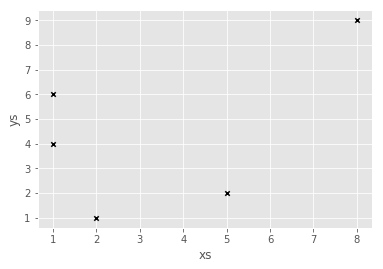

In [257]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})

df.plot.scatter("xs", "ys", color = "black", marker = "x")

**57.** Columns in your DataFrame can also be used to modify colors and sizes.  Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning.  Make a plot which incorporates all four features of this DataFrame.

(Hint:  If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

*The chart doesn't have to be pretty: this isn't a course in data viz!*

```
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
```

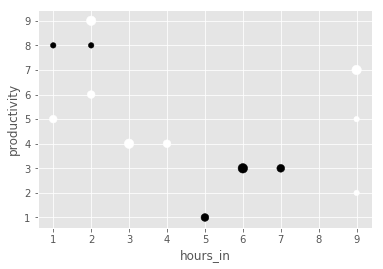

In [258]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

df.plot.scatter("hours_in", "productivity", s = df.happiness * 30, c = df.caffienated)

**58.**  What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

(-1, 12)

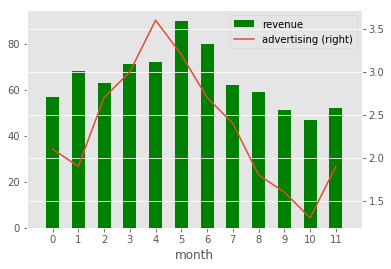

In [259]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

ax = df.plot.bar("month", "revenue", color = "green")
df.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12))

Now we're finally ready to create a candlestick chart, which is a very common tool used to analyze stock price data.  A candlestick chart shows the opening, closing, highest, and lowest price for a stock during a time window.  The color of the "candle" (the thick part of the bar) is green if the stock closed above its opening price, or red if below.

![Candlestick Example](img/candle.jpg)

This was initially designed to be a pandas plotting challenge, but it just so happens that this type of plot is just not feasible using pandas' methods.  If you are unfamiliar with matplotlib, we have provided a function that will plot the chart for you so long as you can use pandas to get the data into the correct format.

Your first step should be to get the data in the correct format using pandas' time-series grouping function.  We would like each candle to represent an hour's worth of data.  You can write your own aggregation function which returns the open/high/low/close, but pandas has a built-in which also does this.

The below cell contains helper functions.  Call ```day_stock_data()``` to generate a DataFrame containing the prices a hypothetical stock sold for, and the time the sale occurred.  Call ```plot_candlestick(df)``` on your properly aggregated and formatted stock data to print the candlestick chart.

In [260]:
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

#Don't read me unless you get stuck!
def plot_candlestick(agg):
    """
    agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]
    """
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

**59.** Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

In [261]:
df = day_stock_data()
df.head()

,time,price
0,2019-01-21 09:30:00,100.000000
1,2019-01-21 09:30:05,100.030358
2,2019-01-21 09:30:05,99.988549
3,2019-01-21 09:30:06,99.989612
4,2019-01-21 09:30:16,100.020515


**60.** Now that you have your properly-formatted data, try to plot it yourself as a candlestick chart.  Use the ```plot_candlestick(df)``` function above, or matplotlib's [```plot``` documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) if you get stuck.

In [262]:
df.set_index("time", inplace = True)
agg = df.resample("H").ohlc()
agg.columns = agg.columns.droplevel()
agg["color"] = (agg.close > agg.open).map({True:"green",False:"red"})
agg.head()

,open,high,low,close,color
time,,,,,
2019-01-21 09:00:00,100.000000,100.207995,98.611789,100.152792,green
2019-01-21 10:00:00,100.120180,100.884666,98.539570,100.358622,green
2019-01-21 11:00:00,100.264581,101.402204,98.528550,98.753153,red
2019-01-21 12:00:00,98.754468,99.460560,97.811706,97.856393,red
2019-01-21 13:00:00,97.894447,100.372880,96.744662,99.615563,green


*More exercises to follow soon...*